# 0050 測試

<AxesSubplot:xlabel='date'>

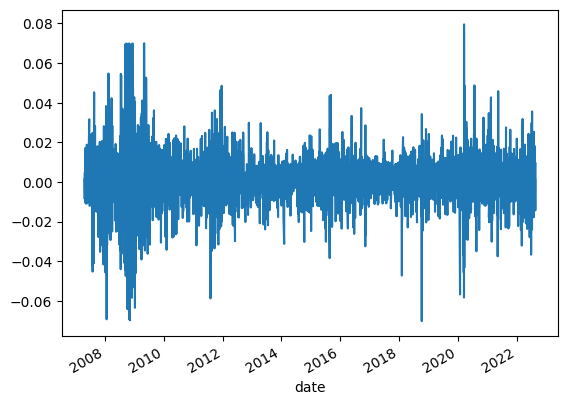

In [2]:
# 移除不必要的警告
import warnings
warnings.filterwarnings('ignore')

# 獲取0050收盤價資料
from finlab.data import Data
data = Data()
close = data.get_adj("收盤價")

# 將收盤假日期調整，這樣子等等使用pyfolio才不會有問題
close.index = close.index.tz_localize("Asia/Taipei")

# 每天報酬率繪圖
%matplotlib inline
close['0050'].pct_change().plot()

# 使用 Pyfolio 觀察個股報酬率

Start date,2007-04-23
End date,2022-08-25
Total months,180
,Backtest
Annual return,8.616%
Cumulative returns,246.276%
Annual volatility,19.979%
Sharpe ratio,0.51
Calmar ratio,0.15
Stability,0.86
Max drawdown,-55.753%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,55.75,2007-10-29,2008-11-20,2011-01-28,850
1,28.22,2020-01-14,2020-03-19,2020-07-13,130
2,26.82,2022-01-17,2022-07-06,NaT,NaN
3,23.01,2011-01-28,2011-12-19,2013-05-16,600
4,20.96,2015-04-27,2015-08-24,2016-08-08,336


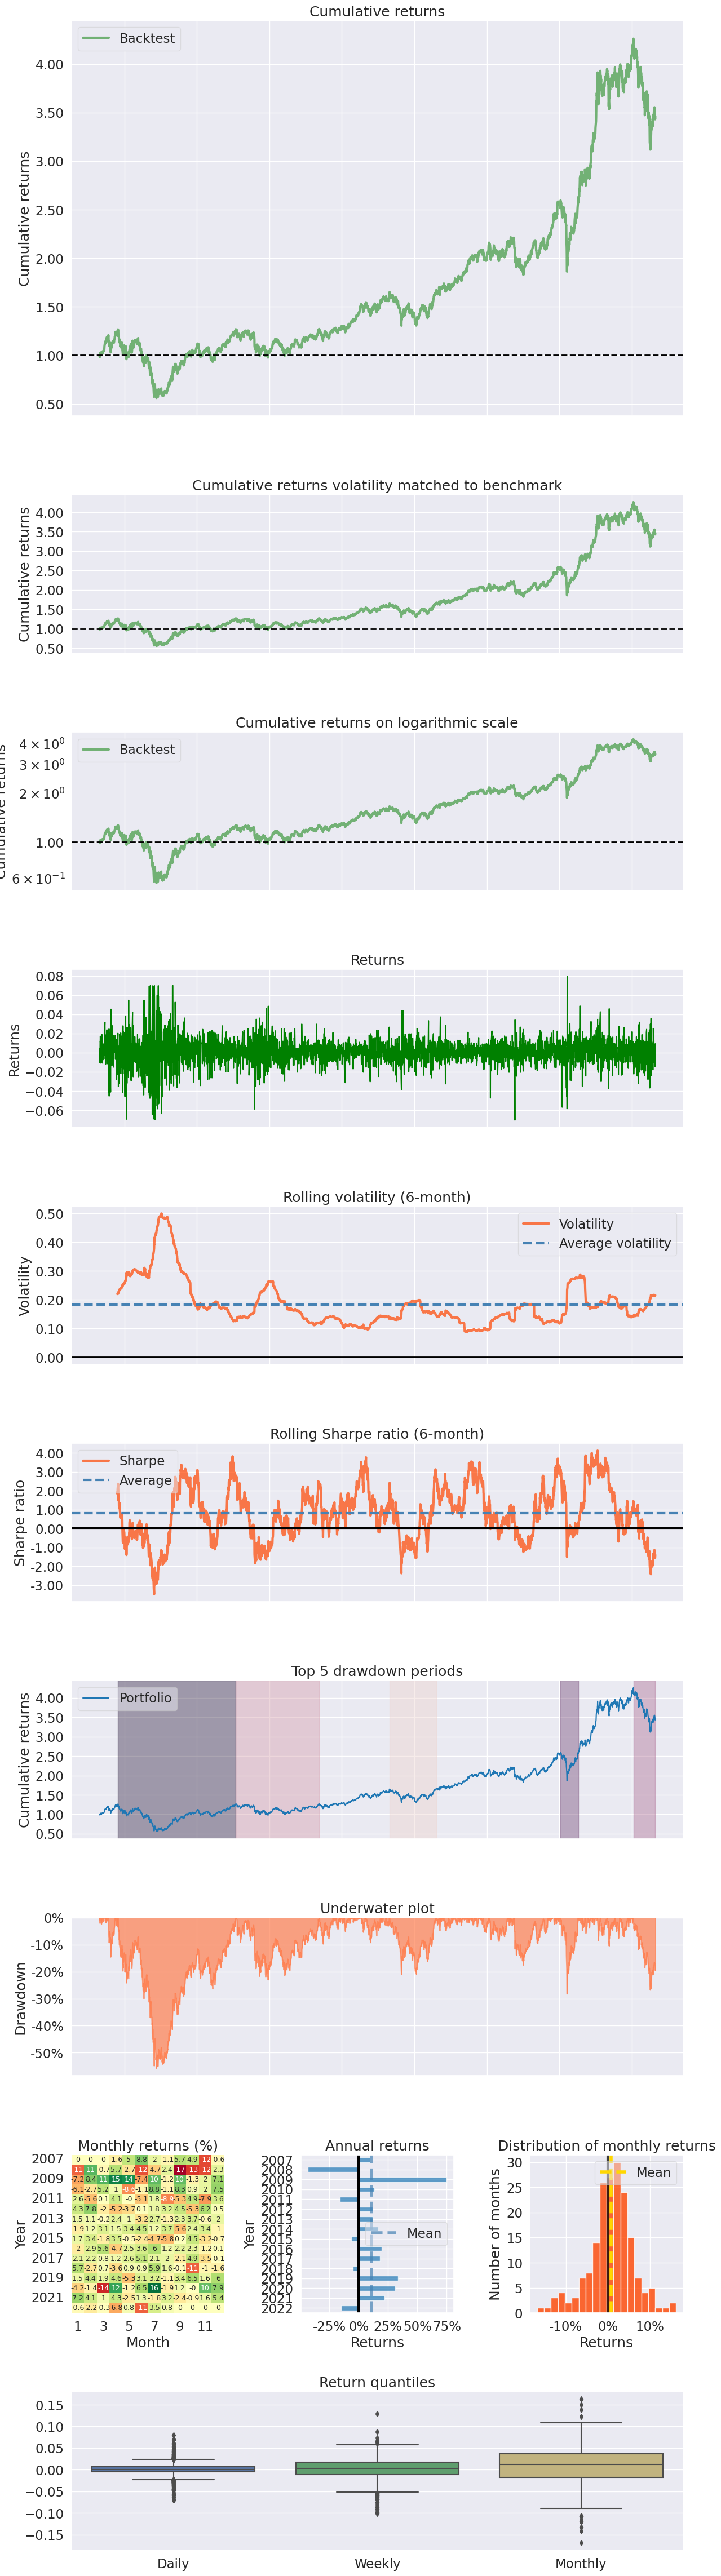

In [9]:
import pyfolio as pf

pf.create_returns_tear_sheet(close['0050'].pct_change())

Start date,2007-04-24
End date,2022-08-25
Total months,180
,Backtest
Annual return,5.543%
Cumulative returns,124.9%
Annual volatility,7.968%
Sharpe ratio,0.71
Calmar ratio,1.07
Stability,0.93
Max drawdown,-5.196%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,5.20,2017-07-25,2021-12-15,NaT,NaN
1,4.68,2012-03-06,2012-04-10,2013-02-04,240
2,3.66,2009-04-24,2009-04-28,2009-07-08,54
3,2.31,2014-12-10,2014-12-11,2014-12-22,9
4,1.61,2014-05-12,2014-05-13,2014-05-14,3


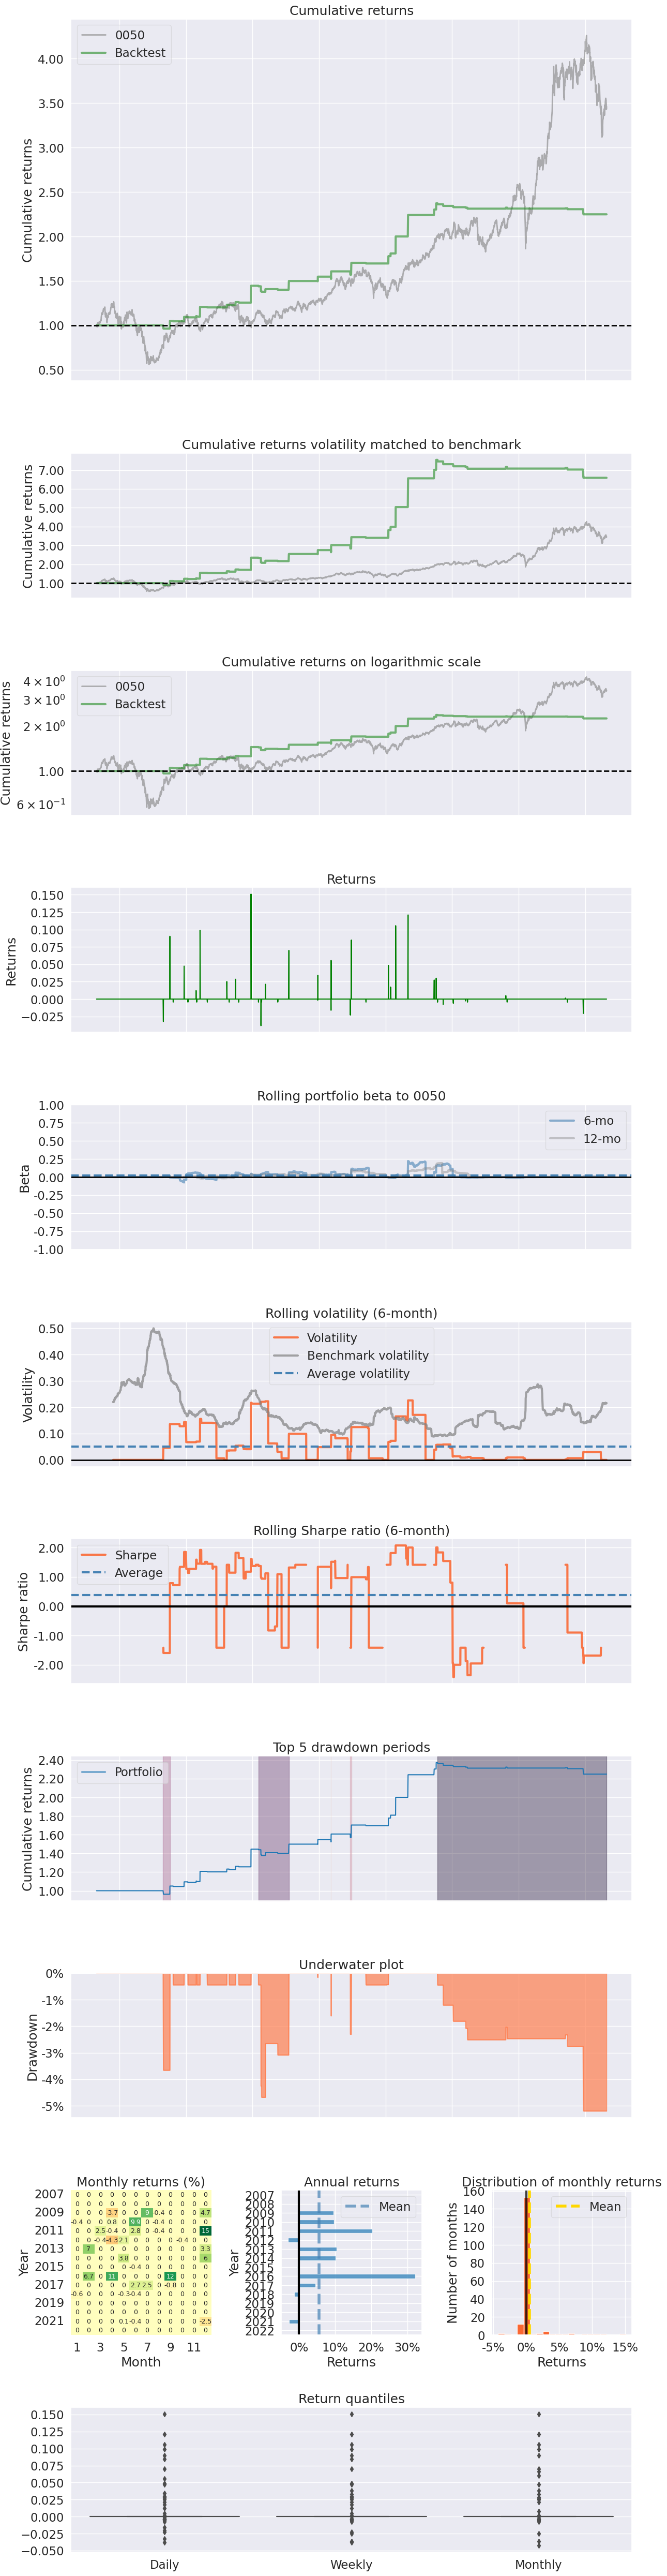

In [34]:
import pickle
import pandas as pd

# 得到 上一個單元的 回測結果
ret = pickle.load(open("return_history.pkl", "rb"))

# 將回測報酬率取出來
ret = ret.pct_change().dropna()
ret.index = pd.to_datetime(ret.index).tz_localize('Asia/Taipei')

# 利用pyfolio 比較報酬率
pf.create_returns_tear_sheet(ret, benchmark_rets=close['0050'].pct_change())

In [40]:
ret = pickle.load(open("return_history.pkl", "rb"))
#ret = ret.pct_change().dropna()
#ret.index = pd.to_datetime(ret.index).tz_localize('Asia/Taipei')
ret

date
2007-04-23    1.0
2007-04-24    NaN
2007-04-25    NaN
2007-04-26    NaN
2007-04-27    NaN
             ... 
2022-08-19    NaN
2022-08-22    NaN
2022-08-23    NaN
2022-08-24    NaN
2022-08-25    NaN
Length: 3787, dtype: float64

In [39]:
ret = pickle.load(open("return_history_1026.pkl", "rb"))
#ret = ret.pct_change().dropna()
#ret.index = pd.to_datetime(ret.index).tz_localize('Asia/Taipei')
ret

2021-01-15    1.039392
2021-02-15    1.162474
2021-03-15    1.259047
2021-04-15    1.194297
2021-05-15    1.393573
2021-06-15    1.439140
2021-07-15    1.421211
2021-08-15    1.418579
2021-09-15    1.412850
2021-10-15    1.463026
2021-11-15    1.520202
2021-12-15    1.583070
2022-01-15    1.573123
2022-02-15    1.553737
2022-03-15    1.566610
2022-04-15    1.547914
2022-05-15    1.601820
2022-06-15    1.480776
2022-07-15    1.577161
dtype: float64

In [37]:
import pyfolio as pf
help(pf.creat_returns_tear_sheet)

AttributeError: module 'pyfolio' has no attribute 'creat_returns_tear_sheet'